# Library Import


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Loading

In [2]:
file_path = 'dataset_preprocessed_Islamabad.xlsx'
data = pd.read_excel(file_path)

In [3]:
data

,Unnamed: 0,daymonth_category,daymonth,weather,max_temp,min_temp,wind,rain,humidity,cloud,pressure,year,weathervalue,avg_temp
0,2020-11-17 11:29:59.787,01/01/2020,01/01/2020,Sunny,18,6,7,0.0,41,12,1024.0,2009,1,12.0
1,2020-11-17 11:30:39.707,01/01/2020,01/01/2020,Sunny,19,4,8,0.0,23,3,1019.0,2010,1,11.5
2,2020-11-17 11:31:16.088,01/01/2020,01/01/2020,Sunny,18,4,7,0.0,38,13,1018.0,2011,1,11.0
3,2020-11-17 11:31:52.926,01/01/2020,01/01/2020,Sunny,14,4,9,0.0,37,4,1023.0,2012,1,9.0
4,2020-11-17 11:32:38.522,01/01/2020,01/01/2020,Sunny,17,6,10,0.0,32,0,1017.0,2013,1,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2020-12-13 19:31:55.464,08/12/2020,08/12/2020,Patchy rain possible,34,25,8,3.5,69,29,1002.0,2010,10,29.5
983,2020-12-13 19:32:11.039,08/12/2020,08/12/2020,Sunny,32,25,9,0.0,68,27,999.0,2011,1,28.5
984,2020-12-13 19:32:26.242,08/12/2020,08/12/2020,Sunny,35,25,5,0.5,45,10,1002.0,2012,1,30.0
985,2020-12-13 19:32:46.982,08/12/2020,08/12/2020,partly cloudy,33,27,7,0.3,67,33,1002.0,2013,7,30.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         987 non-null    datetime64[ns]
 1   daymonth_category  987 non-null    object        
 2   daymonth           987 non-null    object        
 3   weather            987 non-null    object        
 4   max_temp           987 non-null    int64         
 5   min_temp           987 non-null    int64         
 6   wind               987 non-null    int64         
 7   rain               987 non-null    float64       
 8   humidity           987 non-null    int64         
 9   cloud              987 non-null    int64         
 10  pressure           986 non-null    float64       
 11  year               987 non-null    int64         
 12  weathervalue       987 non-null    int64         
 13  avg_temp           987 non-null    float64       
dtypes: datetim

In [5]:
data.describe()

,max_temp,min_temp,wind,rain,humidity,cloud,pressure,year,weathervalue,avg_temp
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,986.000000,987.000000,987.000000,987.000000
mean,27.004053,15.089159,9.208713,1.211449,40.486322,18.077001,1010.735294,2011.028369,2.369807,21.046606
std,8.625166,7.815452,2.190012,3.049614,16.243475,16.466702,7.473263,1.395881,3.140073,8.066933
min,9.000000,2.000000,3.000000,0.000000,11.000000,0.000000,993.000000,2009.000000,1.000000,8.000000
25%,19.000000,8.000000,8.000000,0.000000,29.000000,5.000000,1005.000000,2010.000000,1.000000,13.000000
50%,27.000000,14.000000,9.000000,0.100000,37.000000,14.000000,1012.000000,2011.000000,1.000000,21.000000
75%,34.000000,21.000000,10.000000,1.100000,49.000000,26.000000,1017.000000,2012.000000,1.000000,28.000000
max,44.000000,31.000000,28.000000,35.300000,94.000000,98.000000,1026.000000,2013.000000,16.000000,37.500000


# Preprocessing

In [ ]:
data.dropna(inplace=True)
data['year'] = pd.to_datetime(data['year'], format='%Y')
top_countries = data['daymonth_category'].value_counts().head(5).index
data_top_countries = data[data['daymonth_category'].isin(top_countries)]

# Visualization


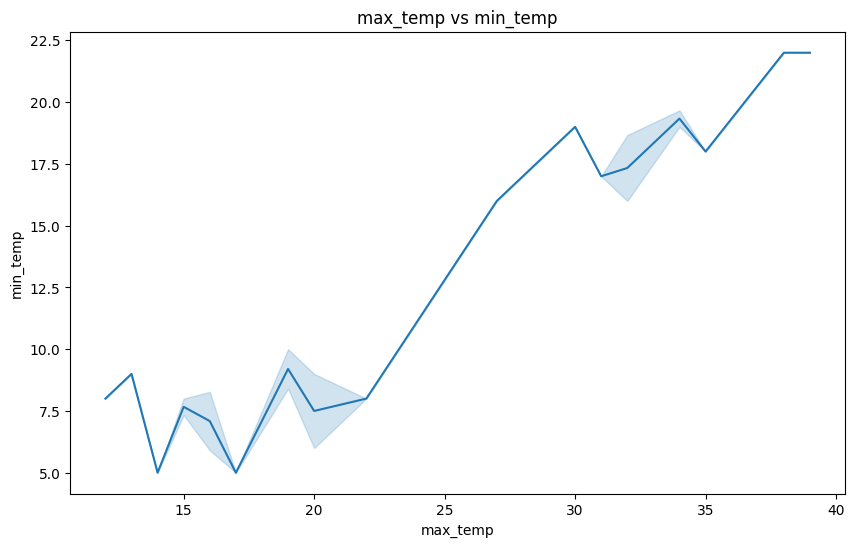

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_top_countries, x='max_temp', y='min_temp')
plt.title('max_temp vs min_temp')
plt.xlabel('max_temp')
plt.ylabel('min_temp')
plt.show()

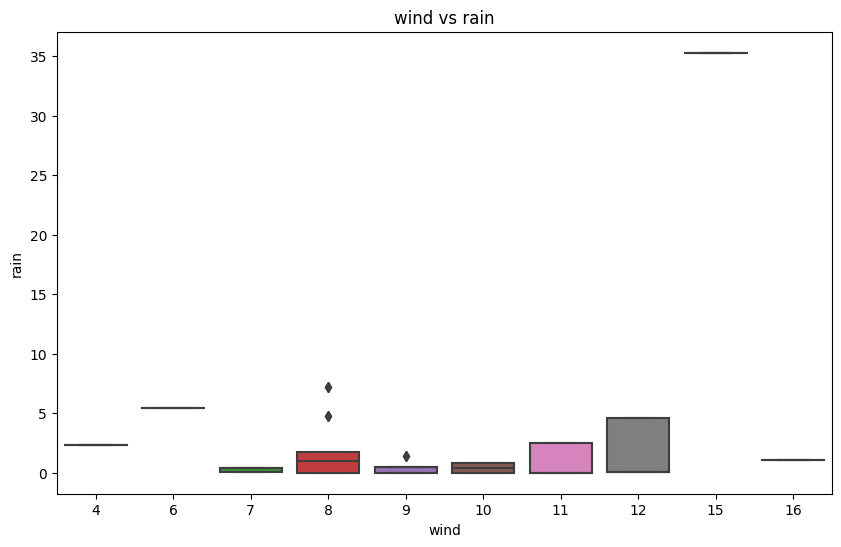

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_top_countries, x='wind', y='rain')
plt.title('wind vs rain')
plt.xlabel('wind')
plt.ylabel('rain')
plt.show()


<ipython-input-8-3be15bbcc853>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


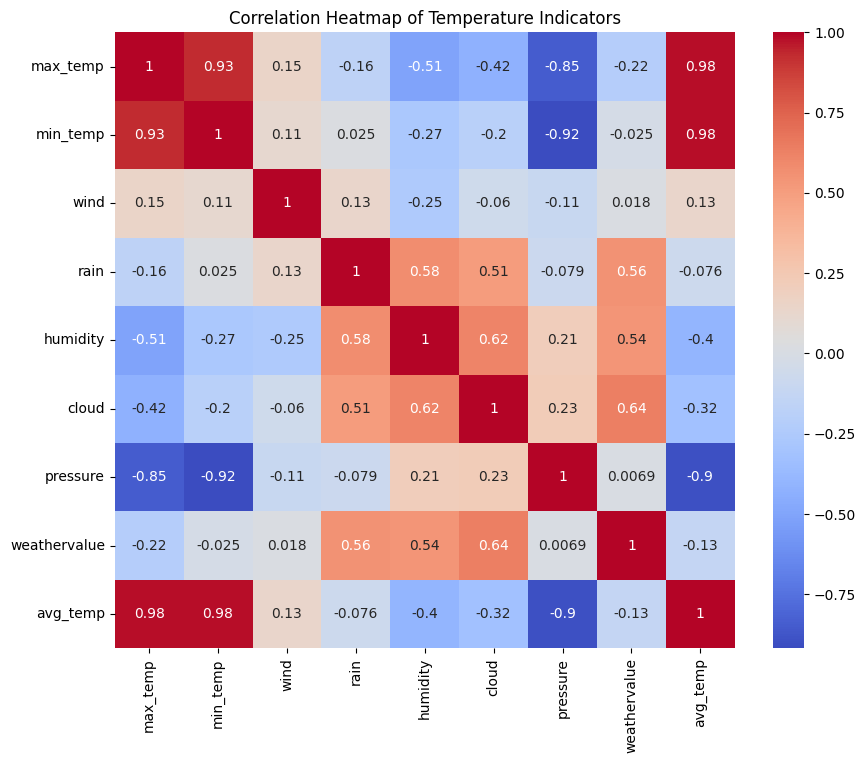

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Temperature Indicators')
plt.show()


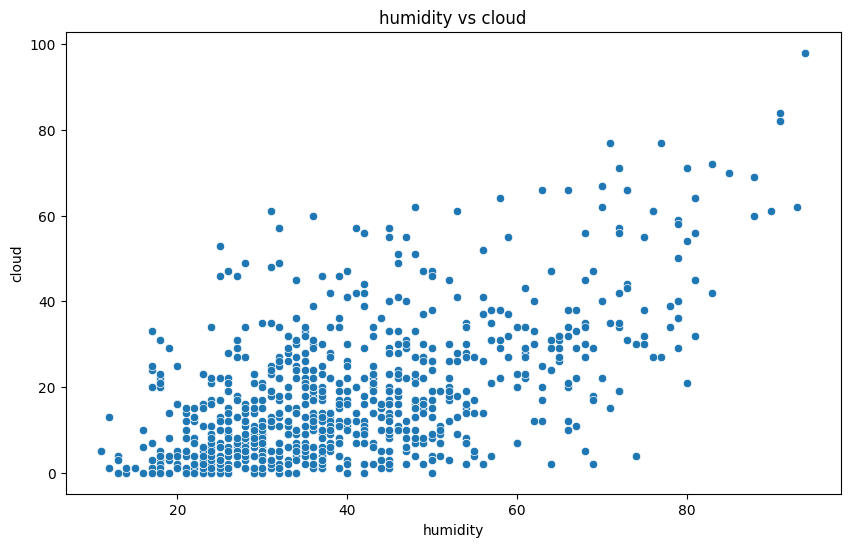

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='humidity', y='cloud')
plt.title('humidity vs cloud')
plt.xlabel('humidity')
plt.ylabel('cloud')
plt.show()

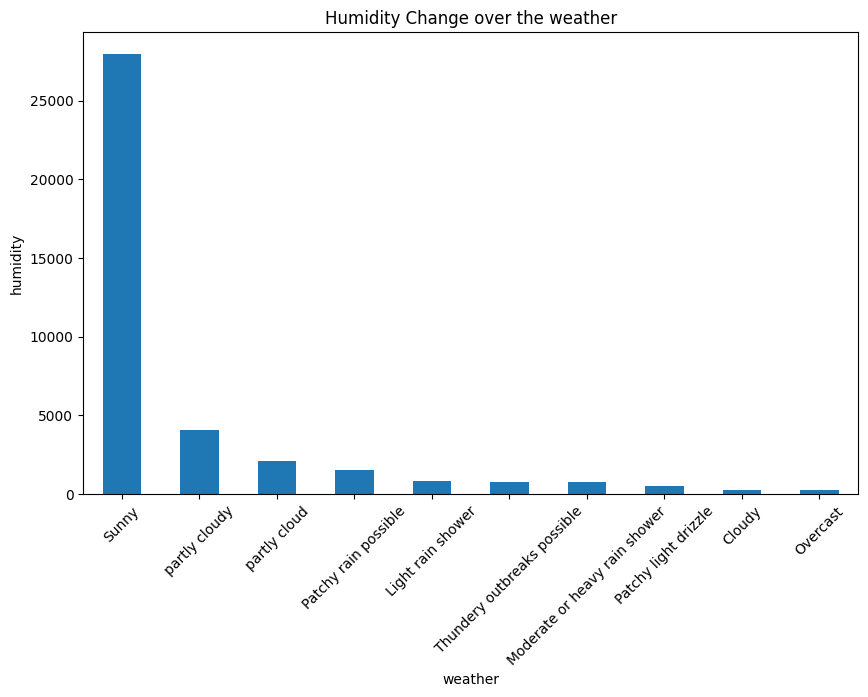

In [ ]:
total_emissions_by_country = data.groupby('weather')['humidity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
total_emissions_by_country.plot(kind='bar')
plt.title('Humidity Change over the weather')
plt.xlabel('weather')
plt.ylabel('humidity')
plt.xticks(rotation=45)
plt.show()